# Energy Production Prediction
**Authors:**

1. Wyclife Orimba
2. Elsie Ochieng
3. Dennis Mutuku
4. Allan Ngeiywa

## Project Overview
Accurately forecasting energy production is crucial for ensuring a reliable and sustainable energy supply. This project aims to develop a time series forecasting model to predict energy production using a dataset of historical energy production data, along with relevant weather, economic, and regulatory factors.

## Business Understanding
The United States has a long and intricate history of energy production marked by technological advancements, environmental concerns, and a growing demand for reliable and sustainable energy sources.

Energy production dates back to 1882 when Thomas Edison constructed Pearl Street Station, the first purpose –built power station. In the same year Edison’s power station, the world’s first hydroelectric plant, went on-line in Appleton, Wisconsin demonstrating the potential of hydropower as a renewable energy source.

The nation's energy landscape has since evolved from its early reliance on hydropower and fossil fuels to embrace a diversified mix of renewable energy sources, including solar, wind, and geothermal power. This transition has been driven by environmental concerns, technological advancements, and government policies aimed at reducing greenhouse gas emissions and promoting energy independence.

Currently, the US energy mix is undergoing a significant transformation, with a growing share of renewable energy and natural gas, while coal's dominance is declining. This shift reflects the nation's commitment to decarbonization and the pursuit of cleaner energy sources. However, the challenge of producing enough energy to meet the demands of an ever-growing population remains

## Problem Statement
The United States is the world's second-largest producer of energy, producing about 16% of the world's energy, for both consumption and exportation. Energy production, however, is not a static process; it is subject to fluctuations that can have significant economic and social consequences.

In 2022 the United States was the largest consumer of energy consuming 100.41 quads according to U.S. Energy Information Administration. This means that ensuring a consistent and reliable energy supply is paramount for sustaining the nation's economic stability and meeting the needs of its population.

As the U.S. transitions towards renewable energy sources, the phasing out of traditional energy sources might create a potential gap incapable of meeting the nation's energy demands. Ensuring a smooth transition necessitates a prediction model that accurately anticipates energy production, guaranteeing a balance between the declining traditional sources and the burgeoning renewable ones. Such a model becomes vital to prevent disruptions in energy supply, uphold stability, and sustainably meet the increasing energy needs during this pivotal shift in the energy landscape.

## Justification of the Study
This study focuses on creating a dependable forecasting model for energy production. Accurate predictions empower efficient management of energy demand, aid in proper resource allocation and planning in line with production trends, and reduce costs associated with energy fluctuations. By developing a robust forecasting tool, this study aims to ensure consistent production, bolstering energy security, and enabling informed decision-making.

### Business Objectives
The main objectives in this project will be:
1.	Develop a robust time series forecasting model that accurately predicts energy production patterns.
2.	Integrate external variables such as weather data to enhance the model's predictive capabilities.
3.	Create an adaptive model that can adjust to changing conditions and evolving production patterns.
4.	Provide a user-friendly interface for stakeholders to access and interpret forecasted energy production data.
5.	Contribute to cost savings, efficient resource utilization, and environmental sustainability through improved energy production forecasts.

### Project Metric of Success
Building a model with a low MSE

### Data Understanding
The data was sourced from the Federal Reserve Economic Data (FRED) that contains frequently updated US macro and regional economic time series at annual, quarterly, monthly, weekly, and daily frequencies. The data contains the following features:

 * Date: Captures monthly timestamps from January 1939 to October 2023.
 * IPG2211A2N: Values showing energy produced for each month

In [1]:
#!pip install --upgrade numpy
!pip install numpy==1.19

# We start by importing all the neccesary python libraries we will use
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

C:\Users\Dennis\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
energy_df = pd.read_csv('IPG2211A2N.csv')
energy_df

,DATE,IPG2211A2N
0,1939-01-01,3.3336
1,1939-02-01,3.3591
2,1939-03-01,3.4354
3,1939-04-01,3.4609
4,1939-05-01,3.4609
...,...,...
1013,2023-06-01,100.5357
1014,2023-07-01,116.8435
1015,2023-08-01,117.3385
1016,2023-09-01,103.5618


In [3]:
energy_df.columns

Index(['DATE', 'IPG2211A2N'], dtype='object')

In [4]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        1018 non-null   object 
 1   IPG2211A2N  1018 non-null   float64
dtypes: float64(1), object(1)
memory usage: 16.0+ KB


In [5]:
energy_df.shape

(1018, 2)

In [6]:
energy_df.describe()

,IPG2211A2N
count,1018.000000
mean,56.242813
std,35.778253
min,3.333600
25%,20.523325
50%,56.524650
75%,89.281275
max,126.373300


In [7]:
# Check for missing values
energy_df.isnull().sum()

DATE          0
IPG2211A2N    0
dtype: int64

In [8]:
# Checking for duplicates
energy_df.duplicated().sum()

0

In [9]:
# Cleaning up the dataset by renaming columns
energy_df.columns = ['Date', 'Energy_production']
energy_df.head()

,Date,Energy_production
0,1939-01-01,3.3336
1,1939-02-01,3.3591
2,1939-03-01,3.4354
3,1939-04-01,3.4609
4,1939-05-01,3.4609


In [10]:
#Convert Date into Datetime
energy_df['Date'] =pd.to_datetime(energy_df['Date'])
energy_df.head()

,Date,Energy_production
0,1939-01-01,3.3336
1,1939-02-01,3.3591
2,1939-03-01,3.4354
3,1939-04-01,3.4609
4,1939-05-01,3.4609


In [11]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1018 non-null   datetime64[ns]
 1   Energy_production  1018 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.0 KB


## Feature Engineering
Feature engineering is an essential step in time series forecasting, as it involves transforming raw data into meaningful features that can be effectively utilized by the forecasting model. In this context, we will extract two new features from the 'Date' column: 'Year' and 'Month'. These new features will provide valuable insights into the seasonal patterns of the time series data. The 'Year' feature will enable the model to capture long-term trends and patterns that may span across multiple years. For instance, the model may identify recurring seasonal patterns or detect shifts in overall trends over time.

The 'Month' feature will allow the model to capture more granular seasonal patterns within each year. By incorporating month-specific information, the model may better understand the impact of seasonal factors on the time series variable.
By extracting these seasonal features, we aim to enhance the predictive capabilities of the time series model by providing it with additional context about the underlying temporal patterns in the data.

In [12]:
#Extract month into a new column
energy_df['Month'] = energy_df['Date'].dt.month

In [13]:
# Create a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:  # Winter: December, January, February
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring: March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer: June, July, August
        return 'Summer'
    else:  # Fall: September, October, November
        return 'Fall'
# Apply the function to the 'DATE' column to create a new 'Season' column
energy_df['Season'] = energy_df['Date'].dt.month.apply(get_season)
energy_df.head(5)

,Date,Energy_production,Month,Season
0,1939-01-01,3.3336,1,Winter
1,1939-02-01,3.3591,2,Winter
2,1939-03-01,3.4354,3,Spring
3,1939-04-01,3.4609,4,Spring
4,1939-05-01,3.4609,5,Spring


In [14]:
# Set Date As the index
energy_df.set_index('Date', inplace = True)
energy_df.head()

,Energy_production,Month,Season
Date,,,
1939-01-01,3.3336,1,Winter
1939-02-01,3.3591,2,Winter
1939-03-01,3.4354,3,Spring
1939-04-01,3.4609,4,Spring
1939-05-01,3.4609,5,Spring


## EDA

In [15]:
# Calculate descriptive statistics
energy_df.describe()

,Energy_production,Month
count,1018.000000,1018.000000
mean,56.242813,6.490177
std,35.778253,3.449937
min,3.333600,1.000000
25%,20.523325,3.250000
50%,56.524650,6.000000
75%,89.281275,9.000000
max,126.373300,12.000000


The production has a wide range, with a minimum of 3.3336 units and a maximum of 126.3733 units per month through out the years. The standard deviation of 35.78 units from the mean indicates a moderate degree of variability in production levels. The 25th percentile 20.52 units and 75th percentile 89.28 units provide a narrower range of typical production levels, encompassing 50% of the observations.

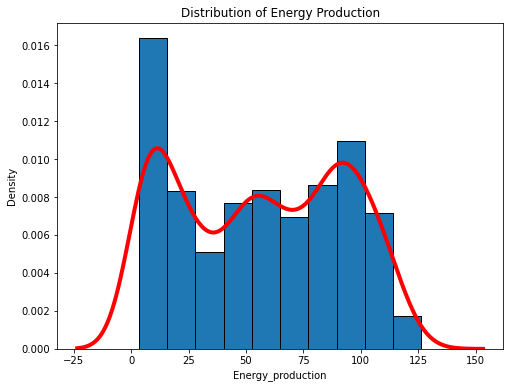

In [16]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(energy_df['Energy_production'], edgecolor='black', density=True)
# Plot KDE
sns.kdeplot(energy_df['Energy_production'], color='red', linewidth=4)
# Set labels and title
plt.xlabel('Energy_production')
plt.ylabel('Density')
plt.title('Distribution of Energy Production')
plt.show()

A visual inspection of the data indicates that it does not have a normal distribution.

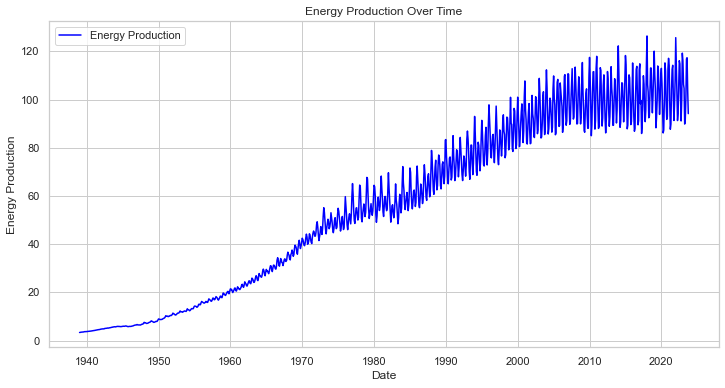

In [17]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(x=energy_df.index, y='Energy_production', data=energy_df, label='Energy Production', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Energy Production')
plt.title('Energy Production Over Time')
plt.legend()

# Show the plot
plt.show()

There appears to be an overall increasing trend in the data along with some seasonal variations. Further investigation of the same is required for certainty.

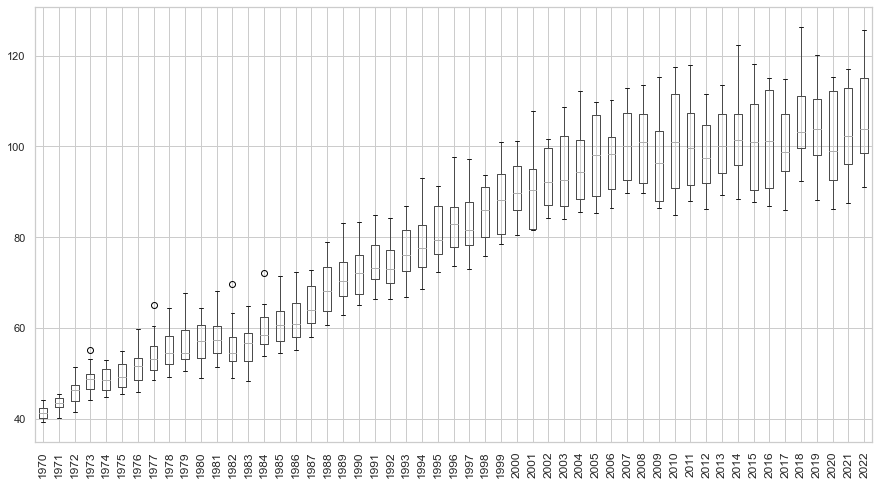

In [18]:
# Create new df for production
dfproduction = pd.DataFrame(energy_df['Energy_production'])

# Use pandas grouper to group values using annual frequency
year_groups = dfproduction['1970':'2022'].groupby(pd.Grouper(freq ='A'))

# Create a new DataFrame and store yearly values in columns  
energy_annual = pd.DataFrame() 

for yr, group in year_groups:
    energy_annual[yr.year] = group.values.ravel()
# Generate a box plot for energy_annual
energy_annual.boxplot(figsize = (15,8))
plt.xticks(rotation=90, fontsize=12)
plt.show()

## Bivarite Analysis

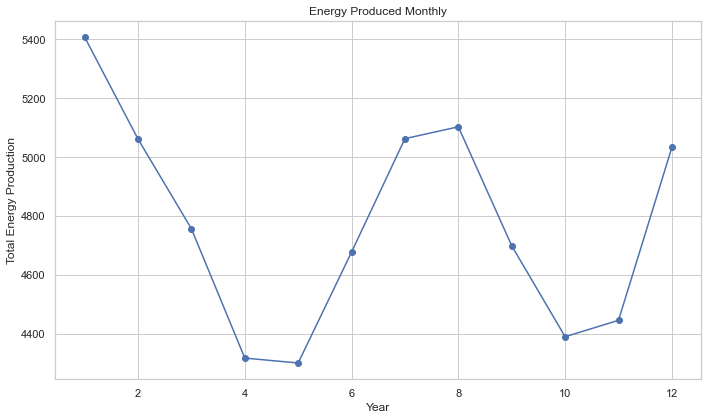

In [19]:
# Grouping by year and calculating the total units produced for each year
units_produced_yearly = energy_df.groupby('Month')['Energy_production'].sum()

# Creating a line graph to show the growth in units produced over the years
plt.figure(figsize=(10, 6))
plt.plot(units_produced_yearly.index, units_produced_yearly.values, marker='o', linestyle='-')

plt.title('Energy Produced Monthly')
plt.xlabel('Year')
plt.ylabel('Total Energy Production')
plt.grid(True)
plt.tight_layout()

plt.show()

From the line graph above we noted that energy demand was lowest in April, May, October and November. Further research revealed that energy demand typically decreases during seasons with milder weather conditions such as Spring and Fall which the months in question fall under. This is because of decreased demand for heating and cooling.

We noted that peak production occured in January, February, July, August and December.
These months fall under Winter when heating demands are high and Summer when there is increased demand for air conditioning

The graph below illustrates energy production by season showing Fall and Spring having lowest energy produced further highlighting Fall and Spring as periods with the lowest energy production. This reaffirms that seasons featuring milder weather conditions exhibit lower consumption, consequently resulting in reduced production

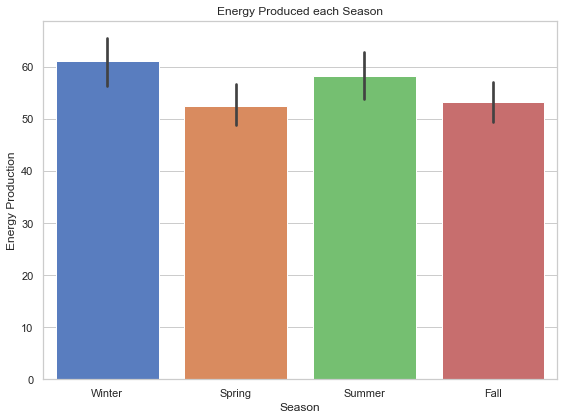

In [20]:
# Plotting the units produced by season using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=energy_df, x='Season', y='Energy_production', palette='muted')
plt.title('Energy Produced each Season')
plt.xlabel('Season')
plt.ylabel('Energy Production')

plt.tight_layout()
plt.show()

## Checking for Stationarity

### Rolling Mean

In [21]:
# Determine rolling statistics
roll_mean = dfproduction.rolling(window=8).mean()
roll_std = dfproduction.rolling(window=8).std()

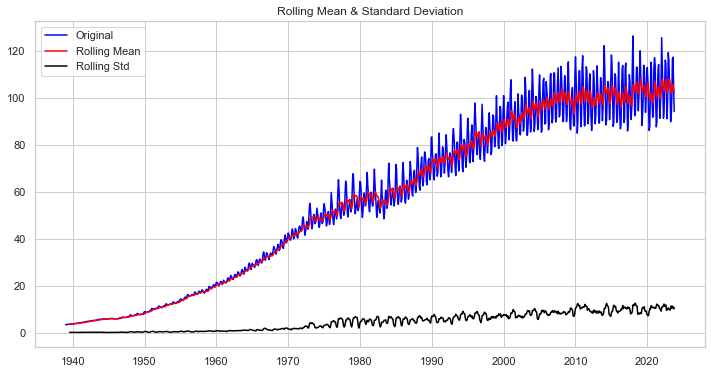

In [22]:
# Plot rolling statistics
fig = plt.figure(figsize=(12,6))
plt.plot(dfproduction, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

From rolling mean, it is evident that our mean is non stationary so we proceed to do Adfuller test for confirmation

### Adfuller Test

In [23]:
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller

In [24]:
# ho: It is non stationary
# h1: It is stationary
def adfuller_test(Energy_production):
    result = adfuller(Energy_production)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Reject the null hypothesis')
    else:
        print('Data is non stationary')

In [25]:
adfuller_test(energy_df['Energy_production'])

ADF Test Statistic : -0.7063953739576422
p-value : 0.8450860298860358
#Lags Used : 22
Number of Observations Used : 995
Data is non stationary


From the adfuller test the p-value is 0.845 which is greater then 0.05 confirming that our data is not stationary

In [26]:
#log transform the data to normalize it
log_df = np.log(energy_df['Energy_production'])

# Convert the series to a DataFrame
energy_df2 = pd.DataFrame(log_df)

energy_df2

,Energy_production
Date,
1939-01-01,1.204053
1939-02-01,1.211673
1939-03-01,1.234133
1939-04-01,1.241529
1939-05-01,1.241529
...,...
2023-06-01,4.610513
2023-07-01,4.760835
2023-08-01,4.765063


In [27]:
# Make the Time Series Stationary
# Take the first difference to make the series stationary
energy_df2['Energy_production First Difference'] = energy_df2['Energy_production'] - energy_df2['Energy_production'].shift(1)

In [28]:
energy_df2['Energy_production'].shift(1)

Date
1939-01-01         NaN
1939-02-01    1.204053
1939-03-01    1.211673
1939-04-01    1.234133
1939-05-01    1.241529
                ...   
2023-06-01    4.519660
2023-07-01    4.610513
2023-08-01    4.760835
2023-09-01    4.765063
2023-10-01    4.640169
Name: Energy_production, Length: 1018, dtype: float64

In [29]:
# We do differencing for 12 months
energy_df2['Seasonal First Difference'] = energy_df2['Energy_production'] - energy_df2['Energy_production'].shift(12)

In [30]:
energy_df2.head(14)

,Energy_production,Energy_production First Difference,Seasonal First Difference
Date,,,
1939-01-01,1.204053,NaN,NaN
1939-02-01,1.211673,0.007620,NaN
1939-03-01,1.234133,0.022460,NaN
1939-04-01,1.241529,0.007395,NaN
1939-05-01,1.241529,0.000000,NaN
1939-06-01,1.256100,0.014572,NaN
1939-07-01,1.256100,0.000000,NaN
1939-08-01,1.270491,0.014390,NaN
1939-09-01,1.298665,0.028174,NaN


Given the presence of very high seasonality, we will first use seasonal differencing. Given
m=12, we need to difference the observation at time t with its lag at t-12. If we do this, the first
12 observations of the differenced series will take NaN values.

This will create a new column Energy_Production_diff that represents the 12-period difference
of 'Energy_Production'

We will remove the NaN observations and plot the data series to check if differencing made the
series stationary.

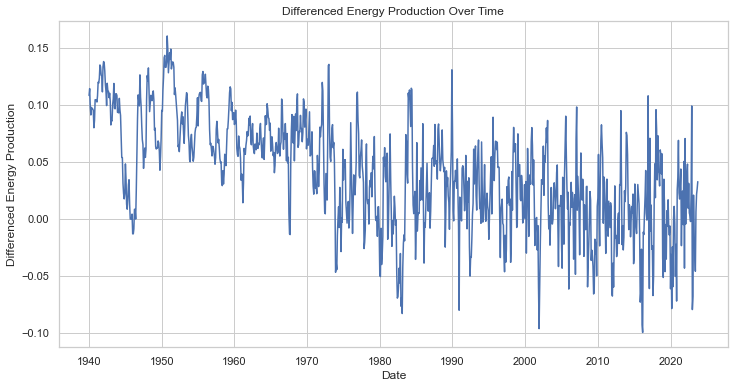

In [31]:
# Plot the differenced time series
plt.figure(figsize=(12, 6))
plt.plot(energy_df2['Seasonal First Difference'])
plt.title('Differenced Energy Production Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Energy Production')
plt.show()

In [32]:
# Check stationarity of the differenced time series
# Test the dickey fuller test again
adfuller_test(energy_df2['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.484902163003674
p-value : 0.008383410897798899
#Lags Used : 16
Number of Observations Used : 989
Reject the null hypothesis


Conclusion:The p value is less than 0.05, Reject the null hypothesis;the
time series is stationary

### Decompose the Time Series

In [34]:
energy_df3 = pd.DataFrame(log_df)
# Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(energy_df3['Energy_production'])

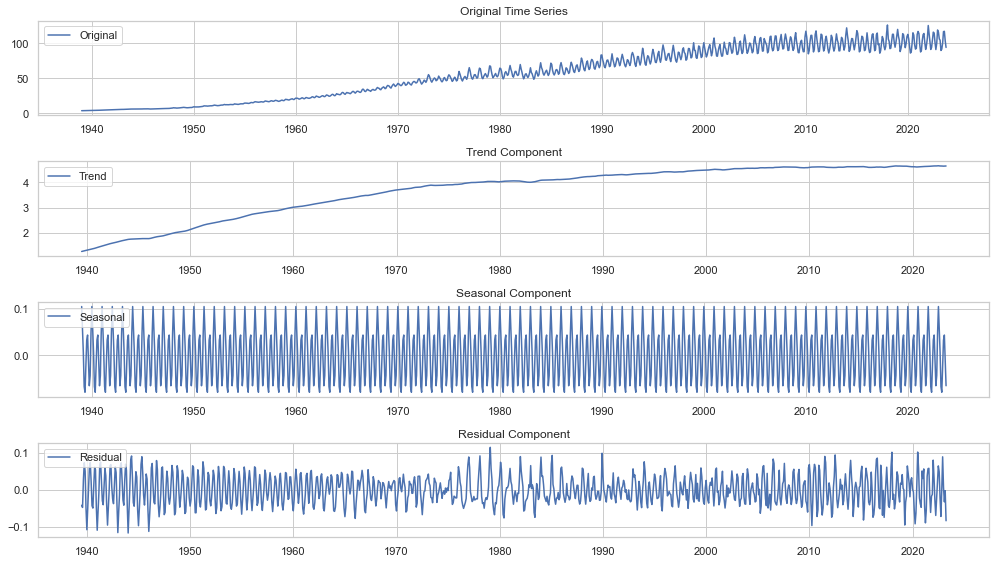

In [35]:
# Plot the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(energy_df['Energy_production'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [36]:

# Drop missing values from residuals 
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

# Check stationarity
adfuller_test(ts_log_decompose)

ADF Test Statistic : -12.840721768297174
p-value : 5.6146036667380665e-24
#Lags Used : 21
Number of Observations Used : 984
Reject the null hypothesis


### Autocorrelation

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

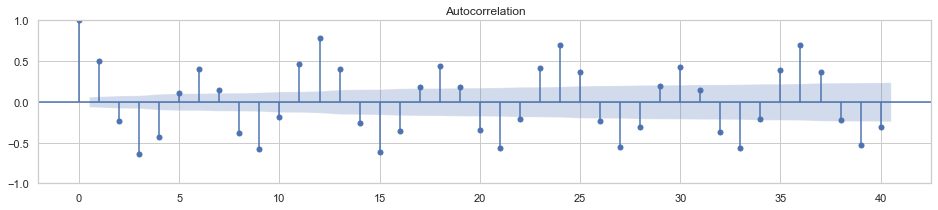

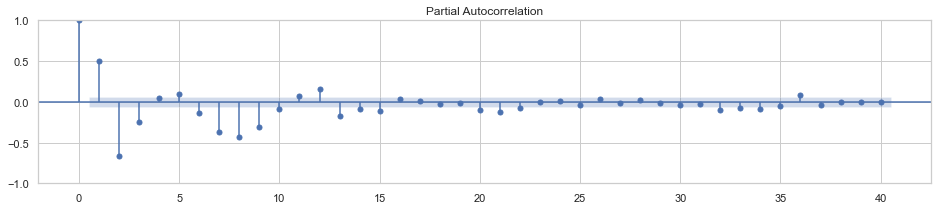

In [40]:
# Correlation and Autocorrelation plots
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(ts_log_decompose, ax=ax, lags=40)

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(ts_log_decompose, ax=ax, lags=40);

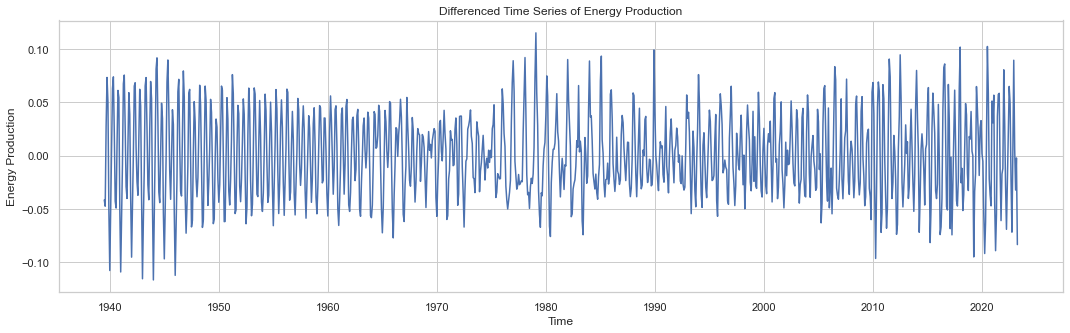

In [41]:
#plot the differenced time series of 'Energy_Production
plt.figure(figsize=(18, 5))
plt.xlabel('Time')
plt.ylabel('Energy Production')
plt.title('Differenced Time Series of Energy Production')
plt.plot(ts_log_decompose)
plt.show()

### PMDARIMA Model Building

In [42]:
#!pip install --user pmdarima
!pip install pmdarima==1.8.0

In [44]:
import pmdarima as pm
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [45]:
# For the Test: we'll need to chop off a portion of our latest data, say from 2013, Jan.
from sklearn.model_selection import train_test_split

# Split data into train and test sets
no_observations = len(ts_log_decompose)

# Calculate the index to split the data
train_size = int(0.8 * no_observations)

# Split data into train and test sets
train = ts_log_decompose.iloc[:train_size]
test = ts_log_decompose.iloc[train_size:]

In [47]:
#looking at the ACF and PACF plots of the differenced data, we can determine model to use
model = auto_arima(train, start_p=0, start_q=0,
 max_p=2, max_q=2,m=12,start_P=0,start_Q=0,
 max_P = 2, max_Q = 2,
 seasonal=True,
d=1,D=1,trace=True,
 error_action='ignore',
suppress_warnings=True,
stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-3675.236, Time=0.30 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-3810.215, Time=0.67 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-3919.265, Time=1.64 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-3691.067, Time=0.30 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-3918.415, Time=1.90 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-3918.847, Time=5.18 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-3816.720, Time=0.86 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-3919.398, Time=5.97 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=-3921.661, Time=7.76 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-3924.542, Time=4.29 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-3900.018, Time=1.98 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=-3916.786, Time=3.59 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=8.03 sec
 ARIMA(0,1,2)(2,1,1)[12]             : AIC=-4164.957, Time=7.57 sec
 ARIMA(0,1,

In [48]:
#Summary of the Arima Model
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  804
Model:             SARIMAX(0, 1, 2)x(2, 1, [1], 12)   Log Likelihood                2088.479
Date:                              Sat, 09 Dec 2023   AIC                          -4164.957
Time:                                      23:57:58   BIC                          -4136.917
Sample:                                           0   HQIC                         -4154.180
                                              - 804                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4655      0.031    -14.831      0.000      -0.527      -0.404
ma.L2         -0.51

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
final_model = SARIMAX(train,order=(0,1,2),seasonal_order=(2,1,1,12))
result = final_model.fit()

In [50]:
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                resid   No. Observations:                  804
Model:             SARIMAX(0, 1, 2)x(2, 1, [1], 12)   Log Likelihood                2088.479
Date:                              Sat, 09 Dec 2023   AIC                          -4164.957
Time:                                      23:58:46   BIC                          -4136.917
Sample:                                  07-01-1939   HQIC                         -4154.180
                                       - 06-01-2006                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4655      0.031    -14.831      0.000      -0.527      -0.404
ma.L2         -0.51

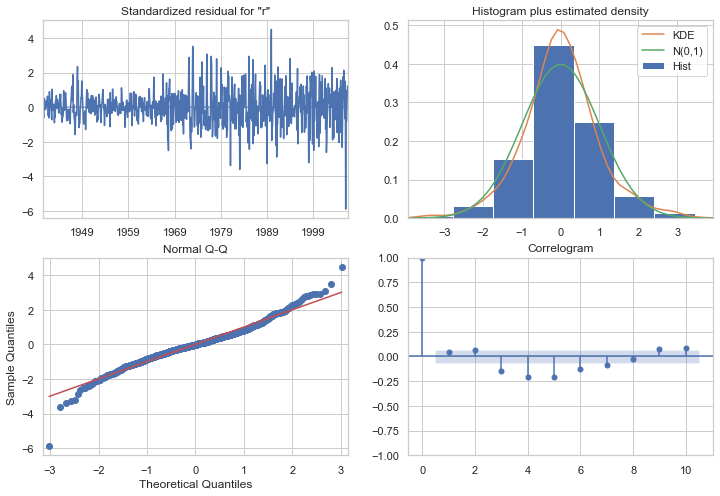

In [53]:
#Diagnostic plots are used to assess the goodness-of-fit and check the ass
# Generate diagnostic plots
diagnostic_plots = result.plot_diagnostics(figsize=(12, 8))
plt.show()

### Model Evaluation

In [51]:
from sklearn.metrics import mean_squared_error
# Get predictions
predictions = result.predict(start=test.index[0], end=test.index[-1])

# Calculate MSE and RMSE
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

# Print MSE and RMSE
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 0.0008454625988933069
Root Mean Squared Error (RMSE): 0.029076839561639208


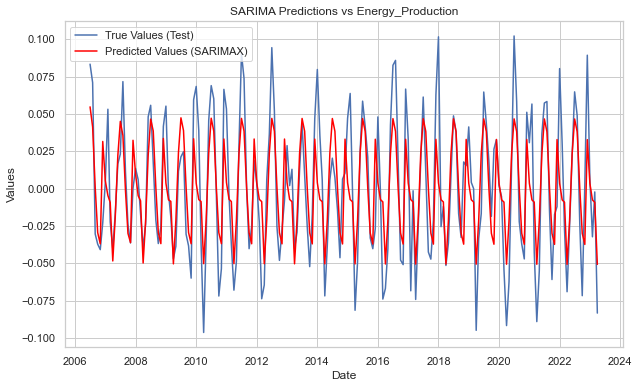

In [52]:
# Plotting test vs predicted values predictions
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='True Values (Test)')
plt.plot(test.index, predictions, color='red', label='Predicted Values (SARIMAX)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('SARIMA Predictions vs Energy_Production')
plt.legend()
plt.show()

## Facebook Prophet

In [57]:
# List of columns to drop
columns_to_drop = ['Month', 'Season']
# create timeseries readable by prophet
ts = energy_df.drop(columns = columns_to_drop).copy()
ts.reset_index(inplace=True)
ts.rename(columns={'Date':'ds', 'Energy_production':'y'}, inplace=True)
ts['y'] = np.log(ts['y'])
ts

,ds,y
0,1939-01-01,1.204053
1,1939-02-01,1.211673
2,1939-03-01,1.234133
3,1939-04-01,1.241529
4,1939-05-01,1.241529
...,...,...
1013,2023-06-01,4.610513
1014,2023-07-01,4.760835
1015,2023-08-01,4.765063
1016,2023-09-01,4.640169


In [59]:
# Install only fbprophet
!pip install fbprophet

In [61]:
from fbprophet import Prophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Base Prophet Model')

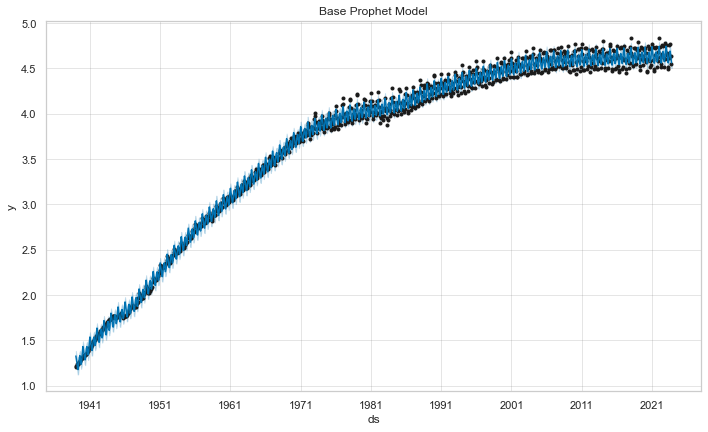

In [63]:
# instantiate the model and fit the timeseries
base_prophet = Prophet()
base_prophet.fit(ts)

# create a future data frame 
base_future = base_prophet.make_future_dataframe(periods=12)
base_forecast = base_prophet.predict(base_future)

# display the most critical output columns from the forecast
base_forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = base_prophet.plot(base_forecast)
plt.title('Base Prophet Model')